<a href="https://colab.research.google.com/github/cyloic/Data-Preprocessing-Formative/blob/main/Group_5_Formative_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 Audio verification Model



Visualizing: christine.wav


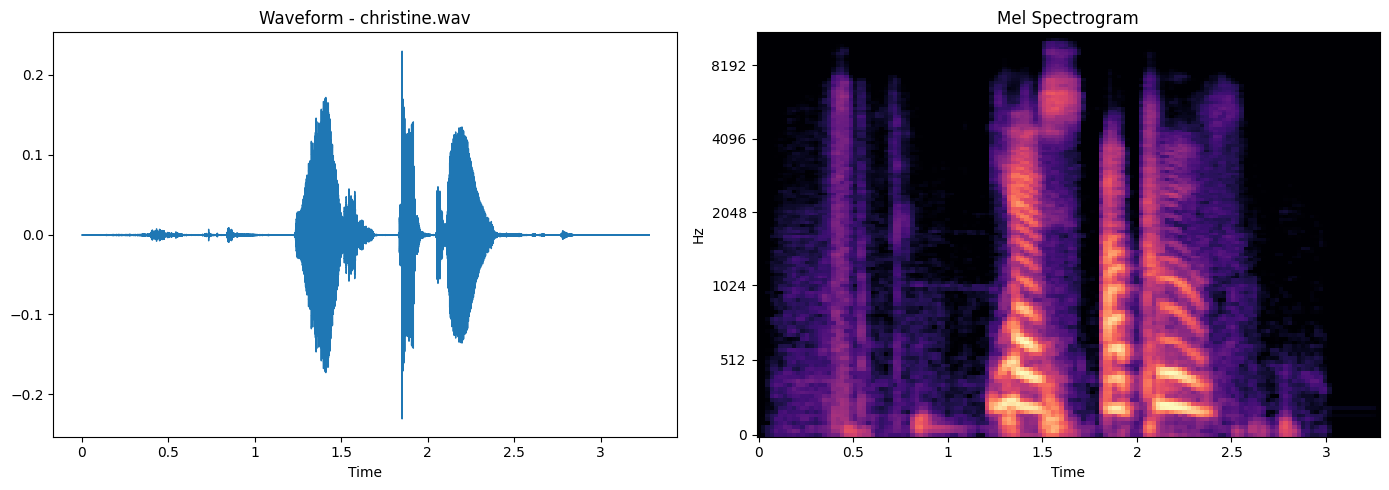

Visualizing: christineaudio2.wav


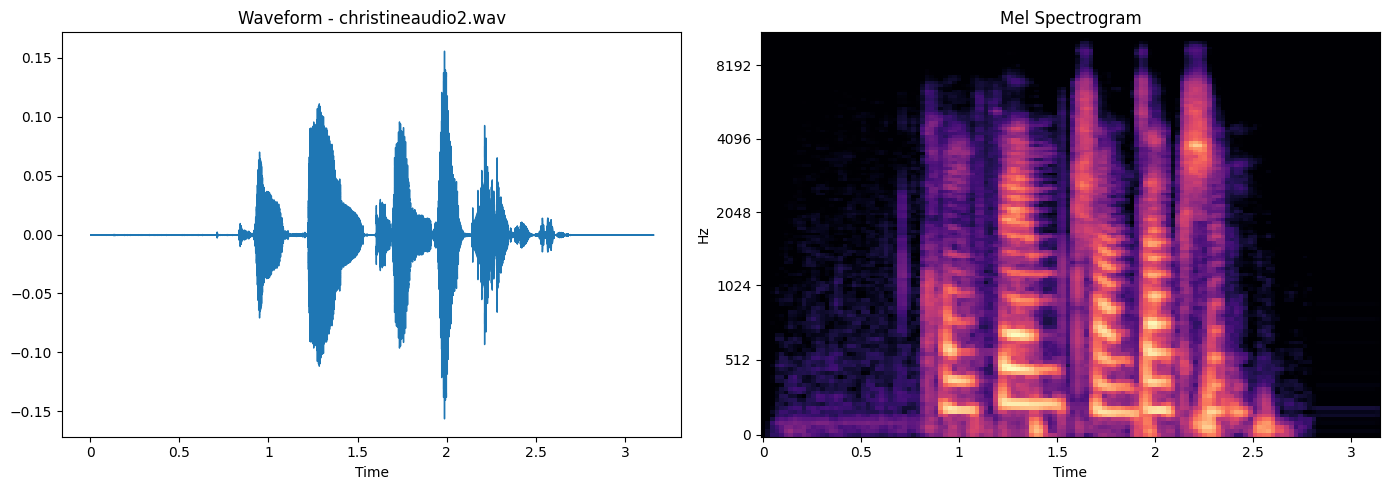

Visualizing: Irene2.dat.wav


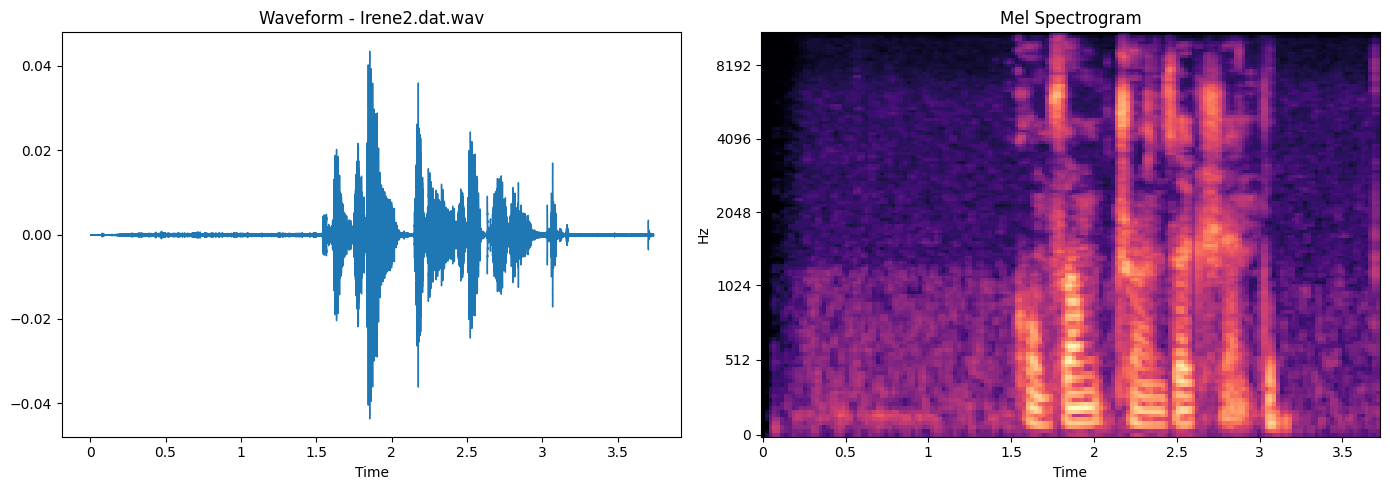

Visualizing: ireneeo.wav


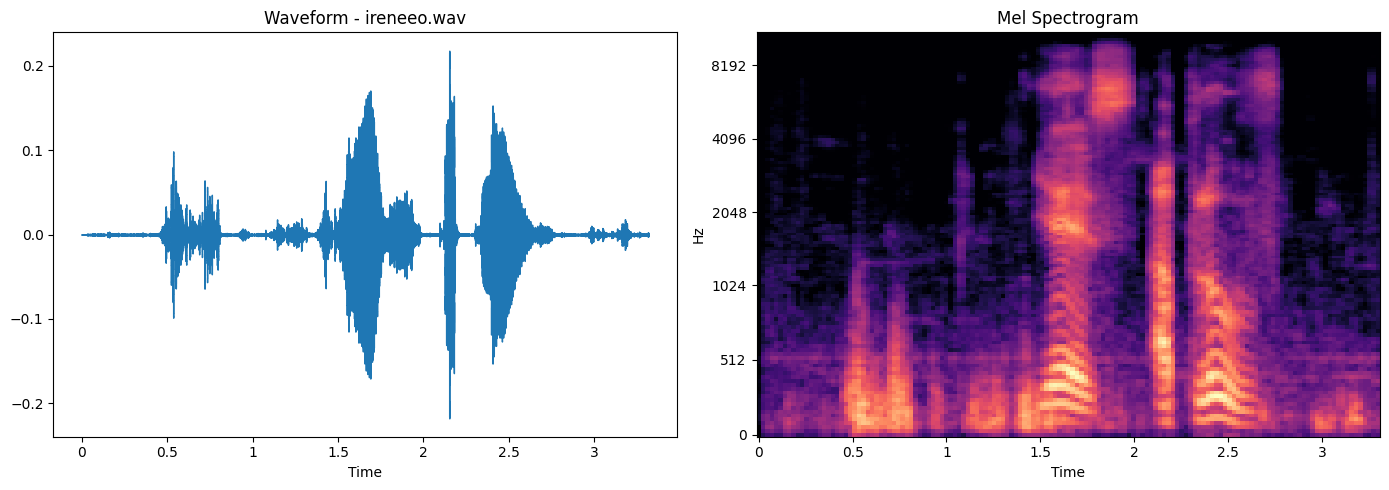

Visualizing: jollyy.waptt.wav


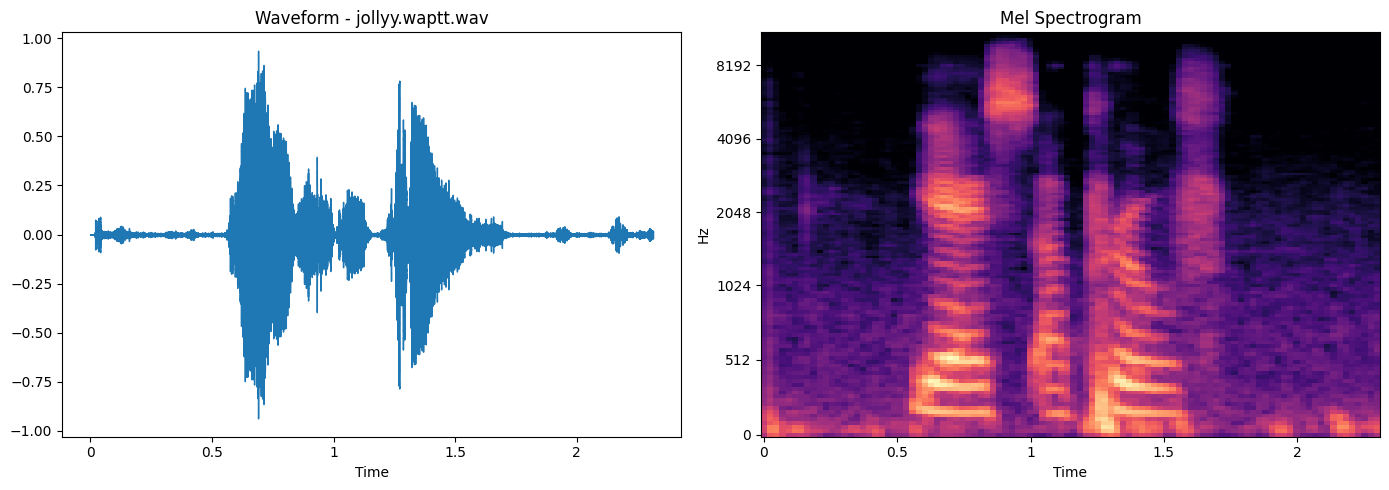

Visualizing: jollyy2waptt.wav


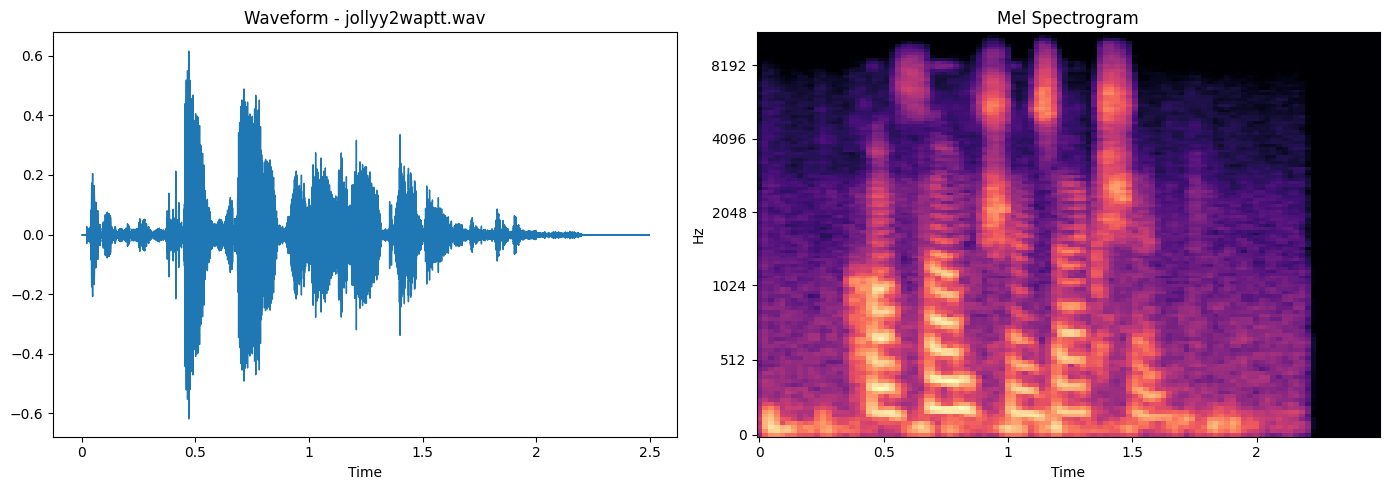

Visualizing: loic.dat.wav


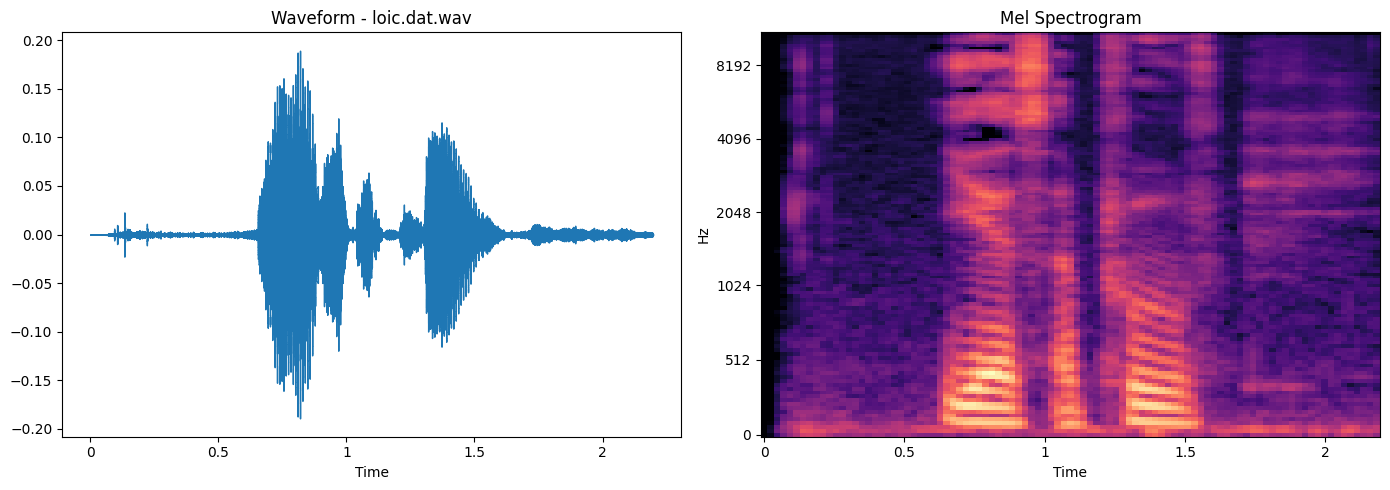

Visualizing: loic3.wav


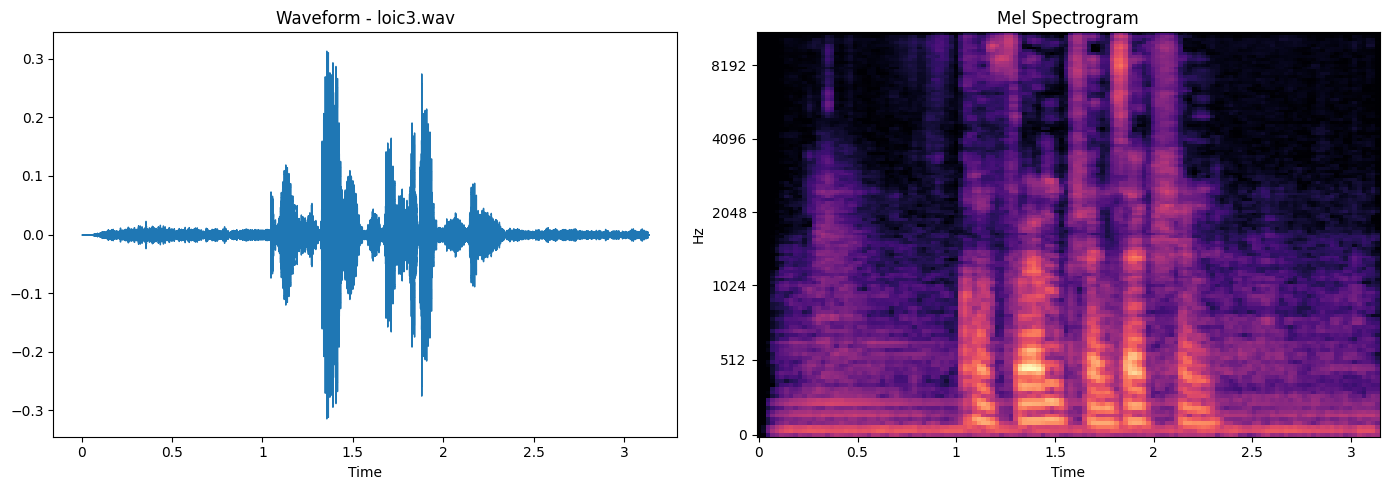

Visualizing: roxane.wav


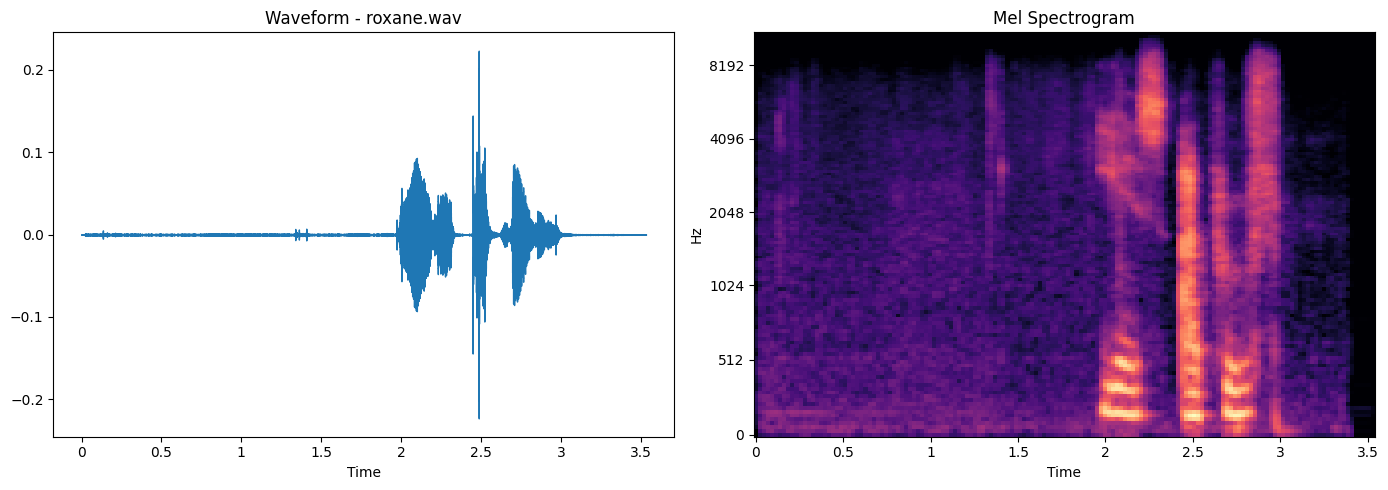

Visualizing: roxane2.wav


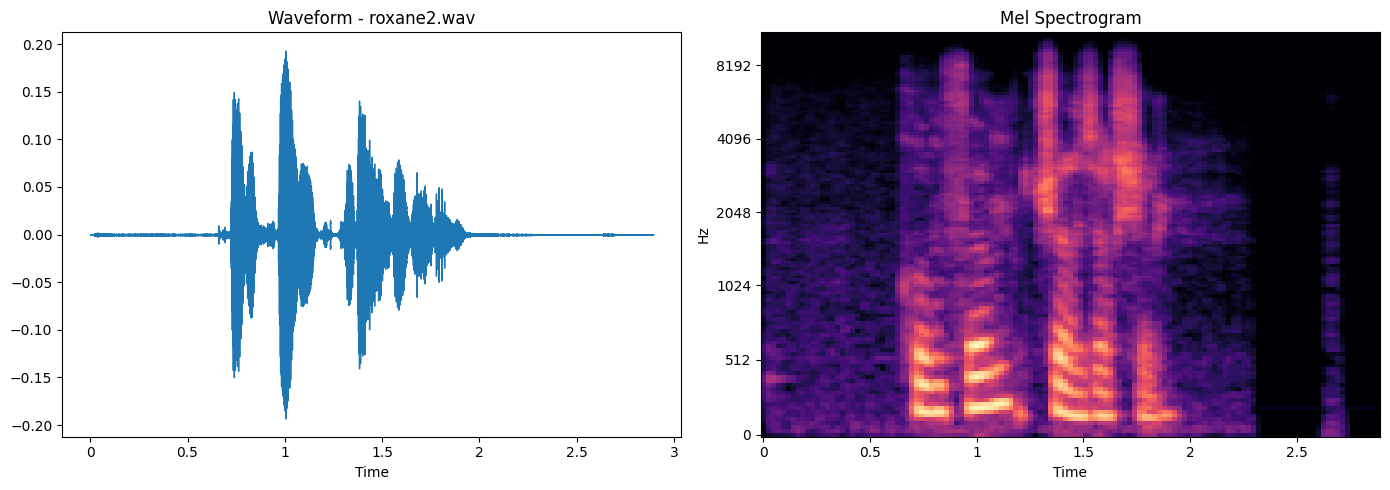

In [39]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to display waveform and mel spectrogram
def display_waveform_and_spectrogram(file_path):
    y, sr = librosa.load(file_path)

    plt.figure(figsize=(14, 5))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform - {os.path.basename(file_path)}")

    # Mel Spectrogram
    plt.subplot(1, 2, 2)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    spec_db = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='mel')
    plt.title("Mel Spectrogram")

    plt.tight_layout()
    plt.show()

# Folder containing audio files
audio_folder = "Datasets/unprocessed_audio_files"

# Loop through files and display each one
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_folder, filename)
        print(f"Visualizing: {filename}")
        display_waveform_and_spectrogram(file_path)


In [ ]:

def augment_audio(file):
    y, sr = librosa.load(file)

    # Pitch Shift
    pitch_audio = librosa.effects.pitch_shift(y, sr=sr, n_steps=4)

    # Time Stretch
    stretch_audio = librosa.effects.time_stretch(y, rate=1.2)

    # Add noise
    noise = np.random.normal(0, 0.005, len(y))
    noisy_audio = y + noise

    return pitch_audio, stretch_audio, noisy_audio

pitch, stretch, noisy = augment_audio(r'Datasets\unprocessed_audio_files\christine.wav')
audio_folder = "Datasets/unprocessed_audio_files"

# Loop through files and display each one
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_folder, filename)
        print(f"Visualizing: {filename}")
        display_waveform_and_spectrogram(file_path)

        pitch, stretch, noisy = augment_audio(file_path)
      


Visualizing: christine.wav


C:\Users\Hp\AppData\Local\Temp\ipykernel_9560\1152580544.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file)


PermissionError: [Errno 13] Permission denied: 'Datasets/unprocessed_audio_files'

In [27]:
import os
import librosa
import pandas as pd
import numpy as np

# Path to your folder
audio_dir = r"Datasets/unprocessed_audio_files"

# Initialize list to collect all extracted features
features_list = []

def extract_features(file_path, label):
    try:
        y, sr = librosa.load(file_path)

        mfcc_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
        energy = np.sum(y ** 2) / len(y)

        features = list(mfcc_features) + [rolloff, energy]
        return pd.Series(features, name=label)
    except Exception as e:
        print(f" Error processing {file_path}: {e}")
        return None

# Loop through all files in the folder
for filename in os.listdir(audio_dir):
    if filename.endswith(".wav"):
        filepath = os.path.join(audio_dir, filename)
        label = os.path.splitext(filename)[0]  # Use filename (no extension) as label
        series = extract_features(filepath, label)
        if series is not None:
            features_list.append(series)

# Create DataFrame
features_df = pd.DataFrame(features_list)

# Set column names
features_df.columns = [f"mfcc_{i+1}" for i in range(13)] + ["spectral_rolloff", "energy"]

# Add label column
features_df["label"] = features_df.index

# Save to CSV
features_df.to_csv("audio_features.csv")
print("All audio features saved to audio_features.csv")


All audio features saved to audio_features.csv


In [28]:
data = pd.read_csv("audio_features.csv")   
data.head()

,Unnamed: 0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,spectral_rolloff,energy,label
0,christine,-568.172058,75.399109,4.678177,25.612728,-0.785763,8.703192,-0.024032,2.531460,-0.152296,-3.011584,0.568491,-1.926423,1.093405,4105.259683,0.000459,christine
1,christineaudio2,-589.585144,88.148880,-2.966656,28.143127,-0.217656,5.911495,5.189301,0.197051,-0.072977,2.120564,1.646411,-0.798234,-1.072158,3724.294146,0.000210,christineaudio2
2,Irene2.dat,-630.089172,85.612457,16.679863,14.228038,-13.966576,18.611502,-5.891134,3.649598,-0.848918,-5.347889,-4.398877,1.880111,-4.743687,5502.201512,0.000008,Irene2.dat
3,ireneeo,-510.243866,110.964600,35.722191,32.529221,13.717528,9.849092,-16.206306,5.217222,-11.019571,-0.296520,-5.209985,-4.935872,-4.497337,2780.644258,0.000396,ireneeo
4,jollyy.waptt,-317.320312,120.429832,8.912470,18.261896,13.332273,9.698285,-14.052798,11.359018,4.477939,-3.727508,0.018718,8.774626,0.138217,2678.407471,0.014016,jollyy.waptt


In [29]:
label_map = {
    'christine': 'Approve',
    'christineaudio2': 'Confirm',
    'Irene2.dat': 'Confirm',
    'ireneeo': 'Approve',
    'jollyy.waptt': 'Approve',
    'jollyy2waptt': 'Confirm',
    'loic.dat': 'Approve',
    'loic3': 'Confirm',
    'roxane': 'Approve',
    'roxane2': 'Confirm'
}
data['Category'] = data['label'].map(label_map)

target_map = {
    'Approve': 1,
    'Confirm': 0
}
data['target'] = data['Category'].map(target_map)


In [35]:
data.columns
data['Unnamed: 0'].astype(str)

0          christine
1    christineaudio2
2         Irene2.dat
3            ireneeo
4       jollyy.waptt
5       jollyy2waptt
6           loic.dat
7              loic3
8             roxane
9            roxane2
Name: Unnamed: 0, dtype: object

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = data.drop(columns= ["label", "Category", "target", "Unnamed: 0"])

y = data['target']# Use speaker labels or sample labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [38]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--voice", type=str, help="Path to audio file")
args = parser.parse_args()

# Extract features and predict
features = extract_features(args.voice, "unknown").values.reshape(1, -1)
prediction = clf.predict(features)
print(f"Prediction: {prediction[0]}")


usage: ipykernel_launcher.py [-h] [--voice VOICE]
ipykernel_launcher.py: error: unrecognized arguments: --f=c:\Users\Hp\AppData\Roaming\jupyter\runtime\kernel-v342ba480b5f3bee403cd59576dc68fb880bdc733f.json


SystemExit: 2

C:\Users\Hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
